In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

from src.book_collaborative_filtering.evaluator import Evaluator

In [2]:
ratings = pd.read_csv('movies.data', sep='\t', names=['user_id', 'item_id', 'rating', 'unix_timestamp'], encoding='latin-1')
number_of_runs = 5000 # ratings["user_id"].nunique()
ratings.head()

,user_id,item_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


# Baseline

In [3]:
params = {
    "neighborhood_method": None,
    "correlation_method": "pearson",
    "minimal_similarity": -1,
    "number_of_neighbors": 0,
    "minimum_number_of_items_rated_in_common": 1,
    "minimal_number_of_ratings": 1,
    "deviation_from_mean": False,
}

evaluator = Evaluator(ratings=ratings, params=params)
evaluator.run_parallel(number_of_runs=number_of_runs)

metrics = pd.DataFrame(evaluator.metrics)
metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
metrics.to_csv("results/movie_cf_results_baseline.csv")

# Correlation Function

In [4]:
params = {
    "neighborhood_method": None,
    "correlation_method": "spearman",
    "minimal_similarity": -1,
    "number_of_neighbors": 0,
    "minimum_number_of_items_rated_in_common": 1,
    "minimal_number_of_ratings": 1,
    "deviation_from_mean": False,
}

evaluator = Evaluator(ratings=ratings, params=params)
evaluator.run_parallel(number_of_runs=number_of_runs)

metrics = pd.DataFrame(evaluator.metrics)
metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
metrics.to_csv("results/movie_cf_results_spearman.csv")

<Axes: xlabel='correlation_method', ylabel='mae'>

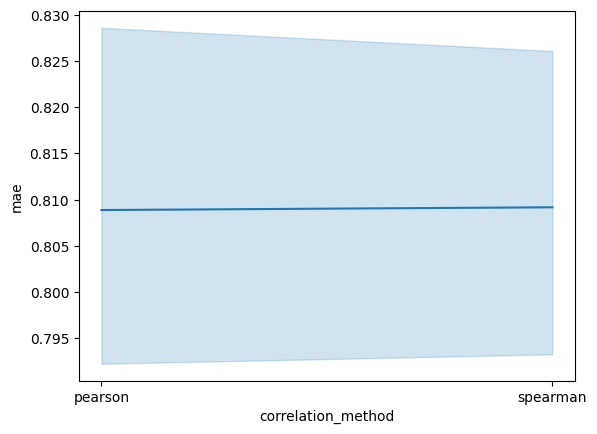

In [6]:
metrics_baseline = pd.read_csv("results/movie_cf_results_baseline.csv")
metrics_spearman = pd.read_csv("results/movie_cf_results_spearman.csv")

sns.lineplot(data=pd.concat([metrics_baseline, metrics_spearman], axis=0).reset_index(), 
             x="correlation_method", y="mae")

# Candidates - Minimum Number of Items Rated in Common

In [3]:
for i, minimum_number_of_items_rated_in_common in enumerate(np.linspace(0, 15, 16)):
    params = {
        "neighborhood_method": None,
        "correlation_method": "pearson",
        "minimal_similarity": -1,
        "number_of_neighbors": 0,
        "minimum_number_of_items_rated_in_common": minimum_number_of_items_rated_in_common,
        "minimal_number_of_ratings": 1,
        "deviation_from_mean": False,
    }

    evaluator = Evaluator(ratings=ratings, params=params)
    evaluator.run_parallel(number_of_runs=number_of_runs)

    metrics = pd.DataFrame(evaluator.metrics)
    metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
    metrics.head()
    metrics.to_csv(f"results/movie_cf_results_minimum_number_of_items_rated_in_common_{i}.csv")

<Axes: xlabel='minimum_number_of_items_rated_in_common', ylabel='mae'>

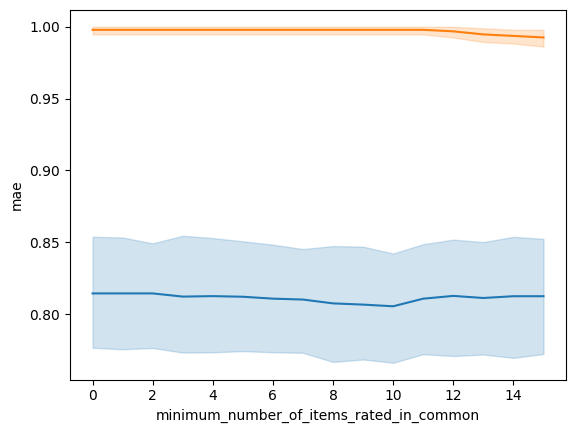

In [5]:
# metrics_baseline = pd.read_csv("results/movie_cf_results_baseline.csv")
metrics_minimum_number_of_items_rated_in_common = pd.concat([pd.read_csv(f"results/movie_cf_results_minimum_number_of_items_rated_in_common_{i}.csv") for i in range(16)], axis=0).reset_index()

sns.lineplot(data=metrics_minimum_number_of_items_rated_in_common , x="minimum_number_of_items_rated_in_common", y="mae")
sns.lineplot(data=metrics_minimum_number_of_items_rated_in_common , x="minimum_number_of_items_rated_in_common", y="coverage")

# Neighborhood - Minimal Similarity

In [9]:
for i, minimal_similarity in enumerate(np.linspace(0.0, 1.0, 11)):
    params = {
        "neighborhood_method": "threshold",
        "correlation_method": "pearson",
        "minimal_similarity": minimal_similarity,
        "number_of_neighbors": 0,
        "minimum_number_of_items_rated_in_common": 1,
        "minimal_number_of_ratings": 1,
        "deviation_from_mean": False,
    }

    evaluator = Evaluator(ratings=ratings, params=params)
    evaluator.run_parallel(number_of_runs=number_of_runs)

    metrics = pd.DataFrame(evaluator.metrics)
    metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
    metrics.head()
    metrics.to_csv(f"results/movie_cf_results_minimal_similarity_{i}.csv")

<Axes: xlabel='minimal_similarity', ylabel='mae'>

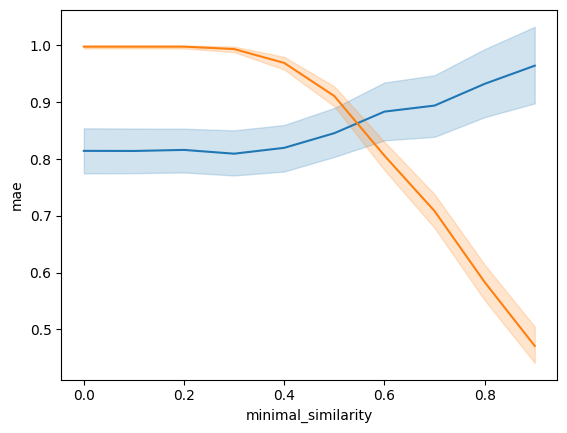

In [10]:
# metrics_baseline = pd.read_csv("results/movie_cf_results_baseline.csv")
metrics_minimal_similarity = pd.concat([pd.read_csv(f"results/movie_cf_results_minimal_similarity_{i}.csv") for i in range(10)], axis=0).reset_index()

sns.lineplot(data=metrics_minimal_similarity, x="minimal_similarity", y="mae")
sns.lineplot(data=metrics_minimal_similarity, x="minimal_similarity", y="coverage")

# Neighborhood - Number of Neighbors

In [11]:
for i, number_of_neighbors in enumerate(np.linspace(100, 1500, 15)):
    params = {
        "neighborhood_method": "number",
        "correlation_method": "pearson",
        "minimal_similarity": -1,
        "number_of_neighbors": int(number_of_neighbors),
        "minimum_number_of_items_rated_in_common": 7,
        "minimal_number_of_ratings": 1,
        "deviation_from_mean": False,
    }

    evaluator = Evaluator(ratings=ratings, params=params)
    evaluator.run_parallel(number_of_runs=number_of_runs)

    metrics = pd.DataFrame(evaluator.metrics)
    metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
    metrics.head()
    metrics.to_csv(f"results/movie_cf_results_number_of_neighbors_{i}.csv")

<Axes: xlabel='number_of_neighbors', ylabel='mae'>

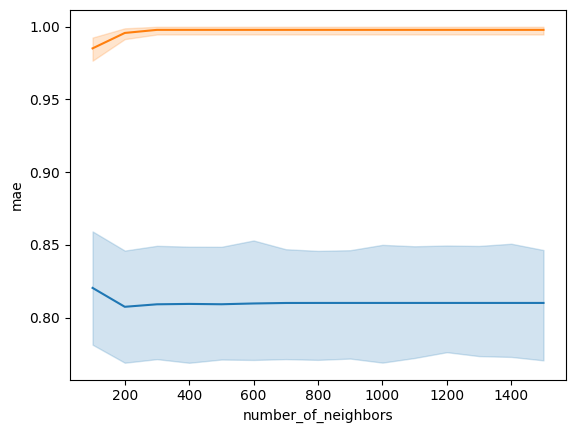

In [12]:
# metrics_baseline = pd.read_csv("results/movie_cf_results_baseline.csv")
number_of_neighbors = pd.concat([pd.read_csv(f"results/movie_cf_results_number_of_neighbors_{i}.csv") for i in range(15)], axis=0).reset_index()

sns.lineplot(data=number_of_neighbors, x="number_of_neighbors", y="mae")
sns.lineplot(data=number_of_neighbors, x="number_of_neighbors", y="coverage")

# Mean adjusted

In [15]:
params = {
    "neighborhood_method": None,
    "correlation_method": "pearson",
    "minimal_similarity": -1,
    "number_of_neighbors": 0,
    "minimum_number_of_items_rated_in_common": 1,
    "minimal_number_of_ratings": 1,
    "deviation_from_mean": True,
}

evaluator = Evaluator(ratings=ratings, params=params)
evaluator.run_parallel(number_of_runs=number_of_runs)

metrics = pd.DataFrame(evaluator.metrics)
metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
metrics.head()
metrics.to_csv("results/movie_cf_results_mean_adjusted.csv")

<Axes: xlabel='deviation_from_mean', ylabel='mae'>

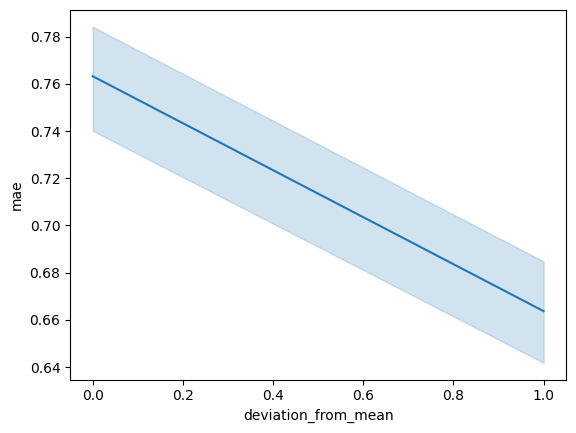

In [16]:
metrics_baseline = pd.read_csv("results/movie_cf_results_baseline.csv")
metrics_mean_adjusted = pd.read_csv("results/movie_cf_results_mean_adjusted.csv")

sns.lineplot(data=pd.concat([metrics_baseline, metrics_mean_adjusted], axis=0) , x="deviation_from_mean", y="mae")